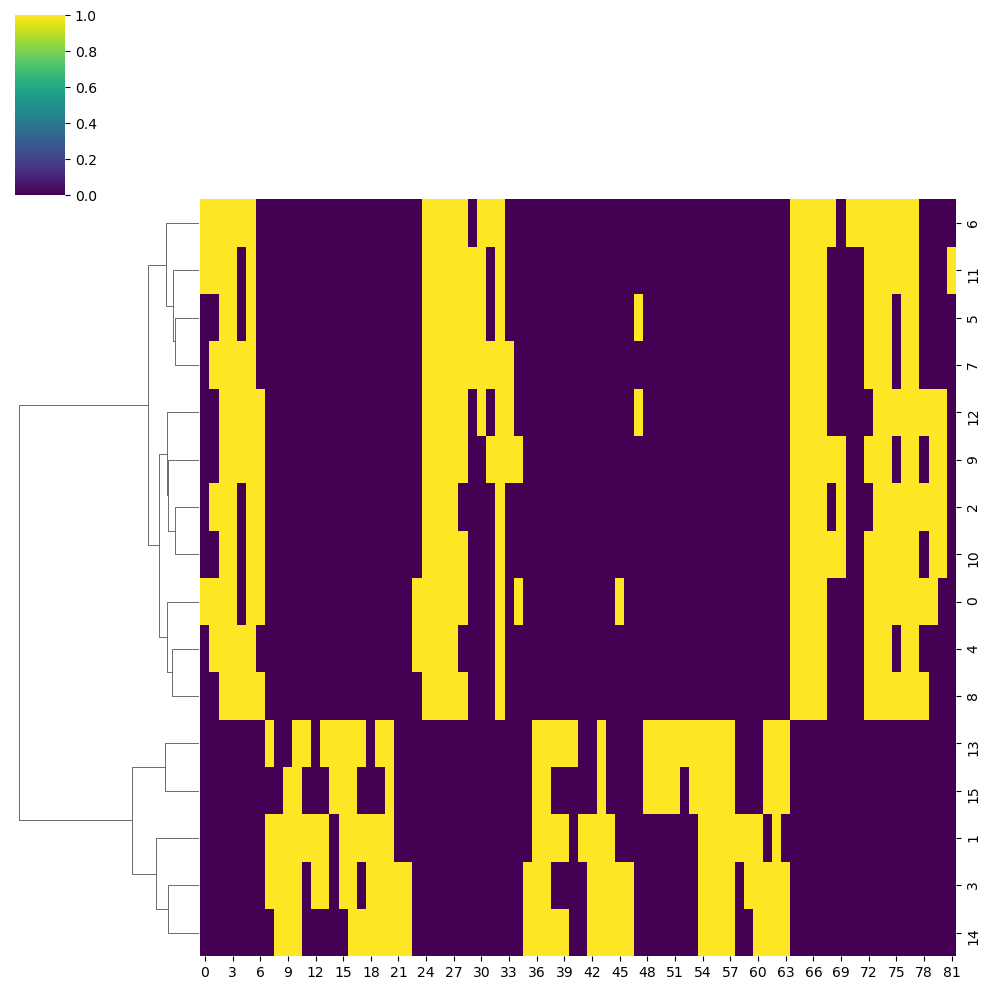

In [1]:
#%%
#CLUSTERLAMA #CLUSTERLAMA #CLUSTERLAMA #CLUSTERLAMA #CLUSTERLAMA #CLUSTERLAMA

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.cluster import hierarchy
from sklearn.preprocessing import MultiLabelBinarizer
from config import processed_dir

csv_file_dir = f"{processed_dir}/pockets.csv"

# Step 1: Read the CSV file
data = pd.read_csv(csv_file_dir)

residues = data['residues'].str.split()  # Split string of residues into lists
mlb = MultiLabelBinarizer()
residues_encoded = mlb.fit_transform(residues)

linkage = hierarchy.linkage(residues_encoded, method='ward')
sns.clustermap(residues_encoded, method='ward', cmap='viridis', row_cluster=True, col_cluster=False)

plt.show()

In [2]:
# Get the clusters at the chosen depth
depth = 3  # Change this value to choose the depth you want to explore
cutree = hierarchy.cut_tree(linkage, n_clusters=depth)

In [3]:
# Function to calculate Euclidean distance
def euclidean_distance(p, q):
    return np.sqrt(np.sum((p - q)**2))

In [4]:
# Get representatives from each cluster at the chosen depth
representatives = []

for cluster_id in range(depth):
    indices = [i for i, c in enumerate(cutree) if c[0] == cluster_id]
    if indices:
        cluster_points = residues_encoded[indices]
        #print(cluster_points)
        centroid = np.mean(cluster_points, axis=0)  # Calculate centroid/mean of the cluster
        # Find euclidean distance of each cluster point to the centroid
        distances = [euclidean_distance(centroid, point) for point in cluster_points]
        # Find the point closest to the centroid
        representative_index = np.argmin(distances)
        representative = cluster_points[representative_index]
        # Find the row in the original data frame that has this representative_index
        representative_pockets = data.iloc[indices[representative_index]]
        # File the representative pocket and the cluster it belongs to
        representatives.append((cluster_id, representative_pockets))

        print(representative_pockets[4], type(representative_pockets))


for rep in representatives:
    print(f"Cluster {rep[0]}:")
    print(rep[1])


 A_1060 A_1061 A_1062 A_1063 A_1064 A_1122 A_1123 A_1124 A_1125 A_1126 A_1130 A_1199 A_1200 A_1201 A_1202 A_1255 A_1256 A_1257 A_1258 A_1259 A_1260 A_1261 <class 'pandas.core.series.Series'>
 A_1073 A_1074 A_1075 A_1076 A_1079 A_1080 A_1110 A_1111 A_1113 A_1115 A_1116 A_1117 A_1118 A_1133 A_1134 A_1135 A_1143 A_1144 A_1147 A_1148 A_1149 A_1183 A_1184 A_1185 A_1186 A_1188 A_1193 A_1194 A_1195 A_1196 <class 'pandas.core.series.Series'>
 A_1073 A_1076 A_1078 A_1080 A_1109 A_1110 A_1111 A_1112 A_1115 A_1116 A_1134 A_1135 A_1136 A_1137 A_1138 A_1144 A_1168 A_1171 A_1172 A_1174 A_1175 A_1182 A_1183 A_1184 A_1185 A_1186 A_1194 A_1195 A_1196 <class 'pandas.core.series.Series'>
Cluster 0:
File name                                       4FOB_backbone_108
Frame                                                         108
pocket_index                                                    1
probability                                                 0.331
residues         A_1060 A_1061 A_1062 A_1063 A_

/tmp/ipykernel_144865/2991548751.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(representative_pockets[4], type(representative_pockets))


In [6]:
import pandas as pd
from config import processed_dir

file_path = f"{processed_dir}/most_similar.txt"


# Clean the contents of the text file by opening it in write mode
with open(file_path, "w") as file:
    pass 

for rep in representatives:
    # Write the Series to a text file using the to_csv() method in append mode
    rep[1].to_csv(file_path, mode='a', index=True, header=False)
    

